# Model analysis project

For the model analysis project, we have chosen to focus on the utility maximization problem from basic consumer theory. It is stated that a rational consumer will maximize their utility based on their disposable income for a given commodity. This means that the consumer have a chosen amount of money to spend on a specific group of interchangable commodities, and therefore, must choose a quantity of each commodity within their budget. This is done based on prices of each commodity and individual preferences of the consumer.

## Describing and solving utility-maximization subject to a budgetconstraint

Utility-maximization is based on a consumers individual preferences, illustrated by an equation explaining utility given by interchangable goods. These preferences are subject to a budget-constraint, illustrating the chosen amount of money, the consumer has chosen to spend on the group of goods in question. The two equations together is an example of a consumerproblem.

We have chosen to explain the optimization of utility based on the simple equations underneath.

In [113]:
# we start out by importing the necessary packages to both manipulate and illustrate the equations and data we have chosen.
import numpy as np
import scipy as sp
import math
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
import matplotlib.pyplot as plt

In [92]:
# we also toggle on nice printing to illustrate our equations
sm.init_printing(use_unicode=True)

In [93]:
# we go on to defining our variables as sympy symbols for equation handling
q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
p1 = sm.symbols('p_1')
p2 = sm.symbols('p_2')
I = sm.symbols('I')
U = sm.symbols('U')

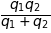

In [94]:
# Next thing is to state the utility function
utility=q1*q2/(q1+q2)
utility

In [95]:
# The consumers preferences are subject to the following budgetconstraint
budgcons=sm.Eq(p1*q1+p2*q2,I)
budgcons

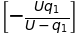

In [96]:
# The indifference curve with respect to q2 is defined for later use
util_q2=sm.solve(sm.Eq(q1*q2/(q1+q2),U),q2)
util_q2

With the model set, we can begin solving the optimization problem theoretically.

In [97]:
# Isolating q2 in the budgetconstraint for later substitutaion
q2_iso=sm.solve(budgcons,q2)
q2_iso

In [98]:
q1_iso=sm.solve(budgcons,q1)
q1_iso

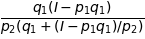

In [102]:
# Substituting q2 into the utility function
util_subsq2=utility.subs(q2,q2_iso[0])
util_subsq2

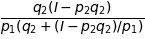

In [103]:
util_subsq1=utility.subs(q1,q1_iso[0])
util_subsq1

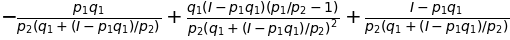

In [104]:
# Deriving the first order condition
foc1=sm.diff(util_subsq2,q1)
foc1

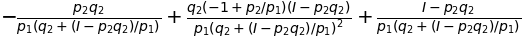

In [105]:
foc2=sm.diff(util_subsq1,q2)
foc2

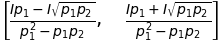

In [106]:
# Deriving the solution for the optimal quantity of commodity 1 based on prices of two commodities and budget.
sol1 = sm.solve(sm.Eq(foc1,0),q1)
sol1

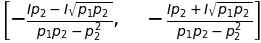

In [107]:
sol2 = sm.solve(sm.Eq(foc2,0),q2)
sol2

## Optimization with values

In [108]:
# We start out by defining the functions found above
# The utility function is defined by
def util(q1,q2):
    return (q1*q2)/(q1+q2)
# The budget constraint with respect to q2 is defined by
def budgcons(q1,p1,p2,I):
    return (I/p2)-(p1/p2)*q1
# The indifference function with respect to q2 is defined by
def indiff(q1,u):
    return (-u*q1)/(u-q1)

In [120]:
# We then go on to defining the funtion for finding the optimal quantities.
def optimum(p1,p2,I):
    q1= (I*p1-I*math.sqrt(p1*p2))/(p1**2-p1*p2)
    q2= -(I*p2-I*math.sqrt(p1*p2))/(p1*p2-p2**2)
    u=util(q1,q2)
    return q1, q2, u

In [110]:
p1, p2 = 0.5, 1
I = 100

pmin, pmax = 0.5, 4
Imin, Imax = 10, 200
qmax = (3/4)*Imax/pmin

In [121]:
optimum(0.5,1,100)

In [115]:
def consume_plot(p1=p1, p2=p2, I=I):

    q1 = np.linspace(0.1,qmax,num=100)
    q1e, q2e, u = optimum(p1, p2 ,I)
    idfc = indiff(q1,u)
    budg = budgcons(q1, p1, p2, I)

    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(q1, budg, lw=2.5)
    ax.plot(q1, idfc, lw=2.5)
    ax.vlines(q1e,0,q2e, linestyles="dashed")
    ax.hlines(q2e,0,q1e, linestyles="dashed")
    ax.plot(q1e,q2e,'ob')
    ax.set_xlim(0, qmax)
    ax.set_ylim(0, qmax)
    ax.set_xlabel(r'$c_1$', fontsize=16)
    ax.set_ylabel('$c_2$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    plt.show()

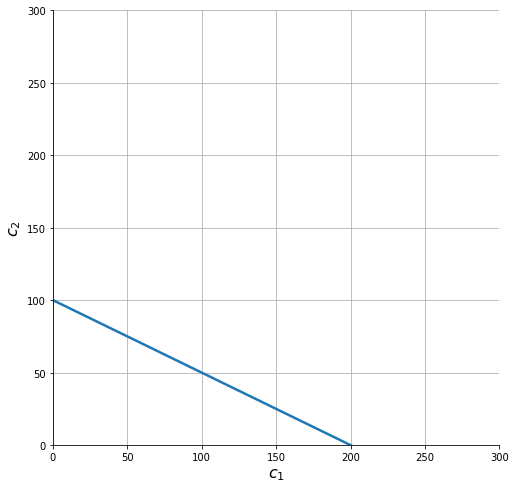

In [116]:
consume_plot()